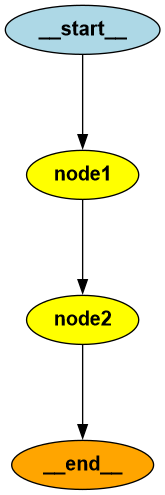

{'foo': 2, 'bar': ['bye']}


In [2]:
from typing_extensions import TypedDict
from langgraph.graph import END, START, StateGraph
from IPython.display import Image, display


class State(TypedDict):
    foo: int
    bar: list[str]

# Node 1 chỉ cập nhật foo
def node1(state: State):
    return {"foo": 2}

# Node 2 chỉ cập nhật bar
def node2(state: State):
    return {"bar": ["bye"]}

# Tạo workflow
graph = StateGraph(State)
graph.add_node("node1", node1)
graph.add_node("node2", node2)
graph.add_edge(START, "node1")
graph.add_edge("node1", "node2")
graph.add_edge("node2", END)

runnable = graph.compile()

## Display graph
try:
    display(Image(runnable.get_graph().draw_png()))
except Exception:
    pass

# Chạy workflow với state ban đầu
output = runnable.invoke({"foo": 1, "bar": ["hi"]})
print(output)  # -> {'foo': 2, 'bar': ['bye']}
